# Titanic: Machine Learning from disaster


# Contenido del Notebook:

#### Parte 1: Exploratory Data Analysis(EDA)
1.1)Analisis univariante y multivariante

#### Parte 2: Feature Engineering and Data Cleaning
2.1)Creación de nuevas variables

2.2)Selección de variables

2.3)Transformaciones de variables previas al modelado

#### Parte 3: Clustering
3.1)K-means

3.2)Clustering jerárquico

3.3)DBSCAN

#### Parte 4: Modelos de clasificación
4.1)Regresión logística

4.2)Árbol de decisión

4.3)Naive Bayes

4.4)Random Forest

4.5) Xgboost

#### Parte 5: Medición
5.1)Predict vs Predit_proba

5.2)Matriz de confusión

5.3)AUC

### Parte 6: Explicatividad


# Parte 1: Exploratory Data Analysis(EDA)

A lo largo de esta primera parte veremos ejemplos de distintas métricas y gráficos con los que podemos explorar nuestros datos.

Representaremos la misma información de distintas formas, para disponibilizar varias opciones, entender bien las diferencias y poder elegir, en función de las necesidades, el mejor gráfico.

Trabajaremos con matplotlib (https://matplotlib.org), seaborn (https://seaborn.pydata.org/index.html) y plotly(https://plotly.com/) como librerias para gráficos.

Cargamos las librerías necesarias:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import xgboost as xg

plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Cargamos el dataset:

(Método específico para Google Colab, dependiendo de nuestro entorno de trabajo aquí podríamos necesitar cargar un csv en nuestra propia máquina o, por ejemplo, establecer la conexión con una base de datos)

In [7]:
data = pd.read_csv('train.csv')

Echemos un vistazo a los datos:

(Sentencia similar a un select * con limit 5)

In [8]:
data.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

Ahora chequearemos la cantidad de valores nulos que aparecen en las variables:

In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Las variables **Age, Cabin and Embarked** continene valores faltantes, deberemos imputarlos.

## Tipos de variables:

### Variables categóricas:


**Variables categóricas en el dataset: Sex,Embarked.**

### Variables ordinales:


**Variables ordinales en el dataset: PClass**

### Variables continuas:


**Variables continuas en el dataset: Age**

## 1.1 Análisis univariante y multivariante

### Ratio de target: ¿Cuántos sobrevivieron?

Tenemos muchas alternativas para un simple conteo de supervivientes y no supervivientes.
Por ejemplo, usando countplot de seaborn (https://seaborn.pydata.org/generated/seaborn.countplot.html):

<Axes: xlabel='Survived', ylabel='count'>

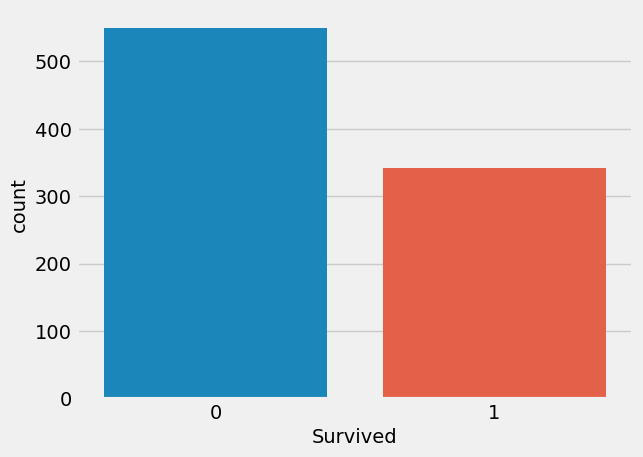

In [10]:
sns.countplot(x='Survived',data=data)

In [11]:
data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [28]:
surb=data.groupby('Survived').Survived.count()
surb

Survived
0    549
1    342
Name: Survived, dtype: int64

In [26]:
nosurb=surb[0]/data['Survived'].count()
nosurb

0.6161616161616161

In [25]:
sisurb=surb[1]/data['Survived'].count()
sisurb

0.3838383838383838

O por ejemplo histogram de plotly(https://plotly.com/python/histograms/):

In [19]:
fig = px.histogram(data, x="Survived")
fig.show()

O simplemente usando la función value_counts de pandas (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html):

<Axes: >

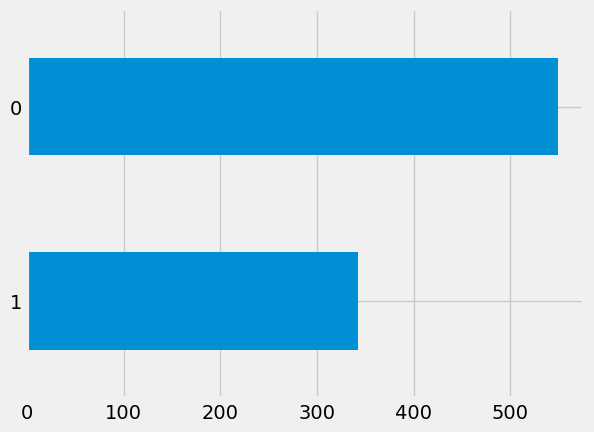

In [20]:
data.Survived.value_counts().sort_values().plot(kind = 'barh')

Para realizar mas de un gráfico dentro del mismo plot usaremos subplots (https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots.html), en los comentarios podemos ver la función de cada sentencia.

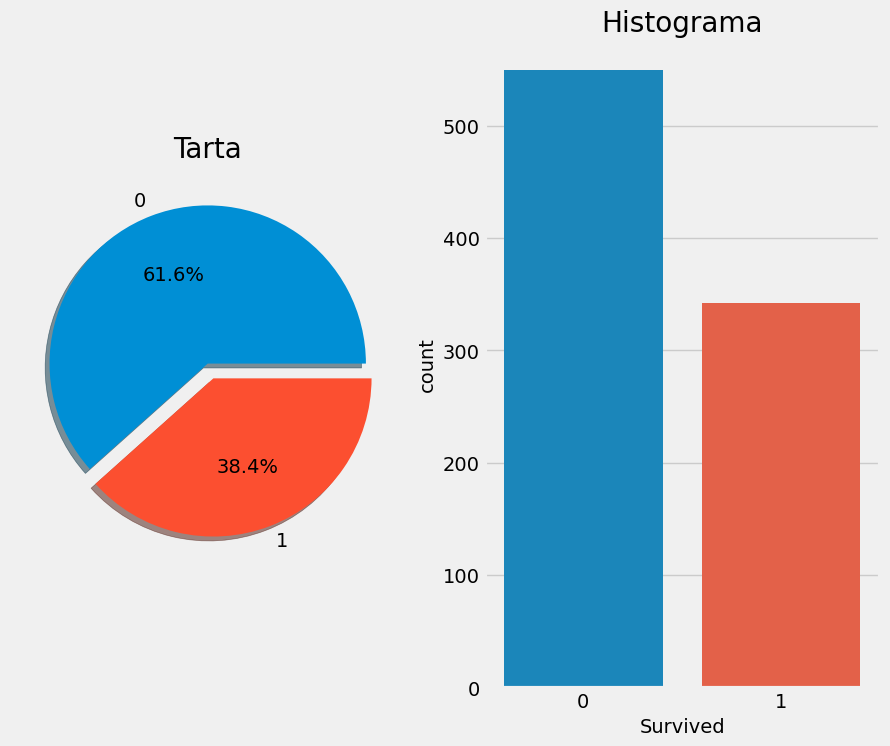

In [29]:
f,ax=plt.subplots(1,2,figsize=(10,8)) # Inicializamos la figura, con el primer y segundo parámetro fijamos el número de filas y columnas.
# Figsize nos permite también fijar el tamaño de nuestro gráfico

data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True) #Representamos en un gráfico de tartas el conteo de los supervivientes
# Importante notar que el parámetro ax=ax[0] nos permite asignar la posición del gráfico dentro del subplot (en este caso solo una coordenada basta)

ax[0].set_title('Tarta') # Fiajmos el título del gráfico
ax[0].set_ylabel('') # Asignamos la etiqueta al eje y

sns.countplot(x='Survived',data=data,ax=ax[1]) # Representamos el histograma, asignandolo a la otra posición del subplot
ax[1].set_title('Histograma')

plt.show()

### Sex

¿Cuántos hombres y mujeres había?

<Axes: xlabel='Sex', ylabel='count'>

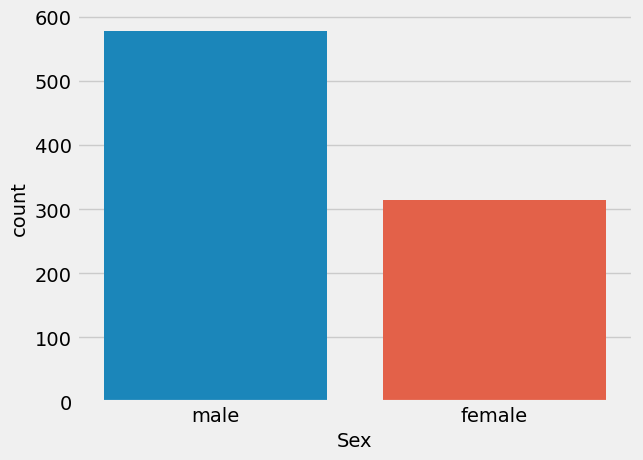

In [36]:
sns.countplot(x='Sex',data=data)

In [31]:
data.groupby('Sex').Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [32]:
data.groupby('Sex').count()

PassengerId  Survived  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex                                                                            
female          314       314     314   314  261    314    314     314   314   
male            577       577     577   577  453    577    577     577   577   

        Cabin  Embarked  
Sex                      
female     97       312  
male      107       577

Usando groupby (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) y la función count podemos obtener el número de supervivientes y no supervivientes por género:

In [33]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Representemos ahora gráficamente estos números:

(Comentaremos los detalles específicos de este gráfico, varias de las sentencias y funciones han sido explicadas en el primer gráfico de este tipo)

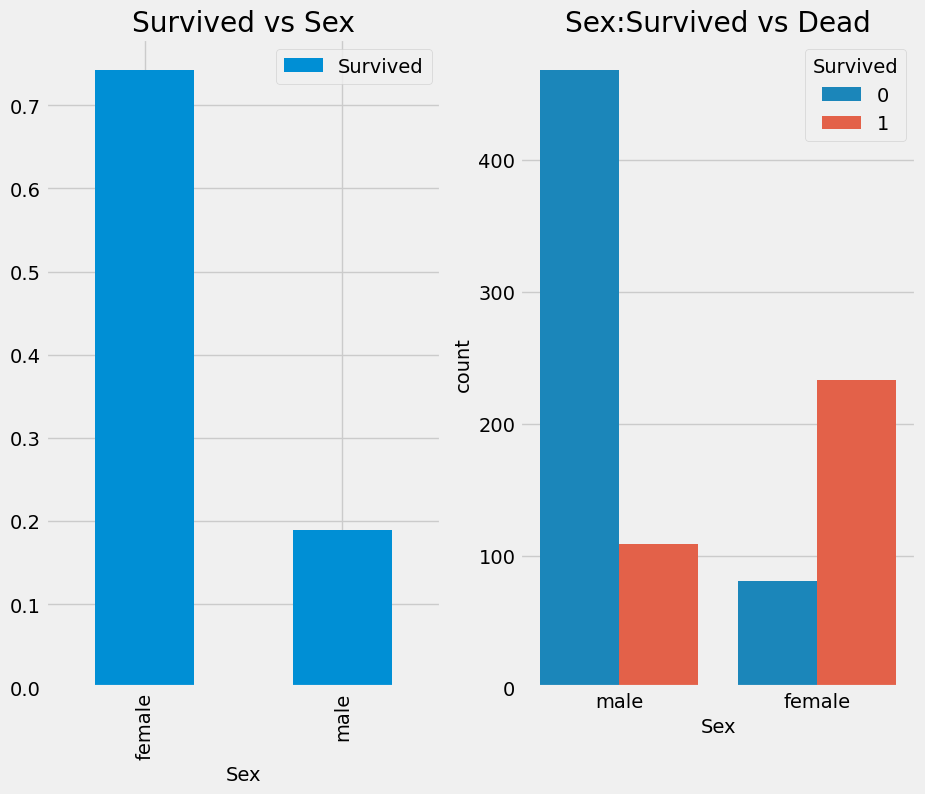

In [39]:
f,ax=plt.subplots(1,2,figsize=(10,8))

data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0]) # Calculamos el ratio de supervivientes por género (podemos usar la media pues es una variable 1/0)
ax[0].set_title('Survived vs Sex')

sns.countplot(x='Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')

plt.show()

### Pclass

¿Y cuánto viajeros había en cada clase?

<Axes: xlabel='Pclass', ylabel='count'>

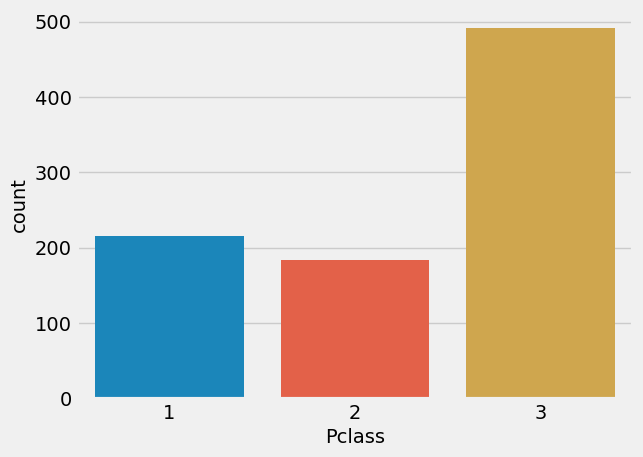

In [40]:
sns.countplot(x='Pclass',data=data)

Estudiemos ahora las proporciones de supervivientes en función de la clase en la que viajaban:

Usaremos la funcion crosstab (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html)

In [41]:
pd.crosstab(data.Pclass,data.Survived, margins = True).style.background_gradient(cmap='summer_r')

In [42]:
pd.crosstab(data.Pclass,data.Survived, normalize='index', margins=True).style.background_gradient(cmap='summer_r')

Y lo representamos gráficamente:

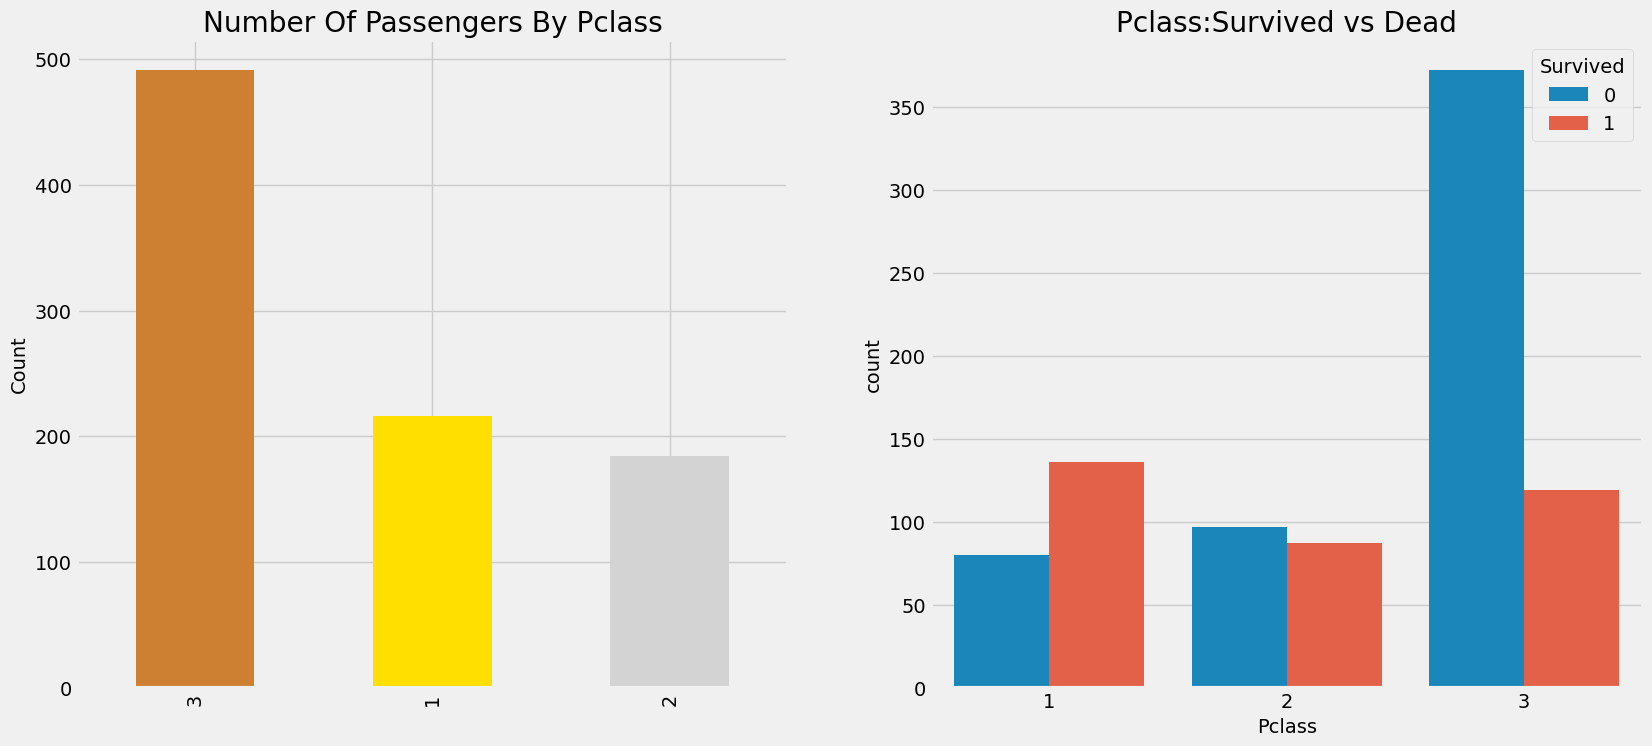

In [43]:
f,ax=plt.subplots(1,2,figsize=(18,8))

data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot(x='Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')

plt.show()

Podemos incluso usar la función crosstab para combinar en la misma matriz la combinación de 3 variables distintas:

In [44]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True, normalize='index').style.background_gradient(cmap='summer_r')

In [45]:
pd.crosstab([data.Sex,data.Pclass],data.Survived,margins=True, normalize='index').style.background_gradient(cmap='summer_r')

### Age

Ahora podemos observar cómo se distribuye nuestro pasaje en función de su edad:

In [46]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


In [47]:
fig = px.histogram(data, x="Age")
fig.show()

Si combinamos edad con género tenemos el siguiente histograma:

In [48]:
fig = px.histogram(data, x="Age", color="Sex")
fig.show()

También podemos optar por un boxplot o diagrama de caja, que, recordad, representa los siguientes valores:

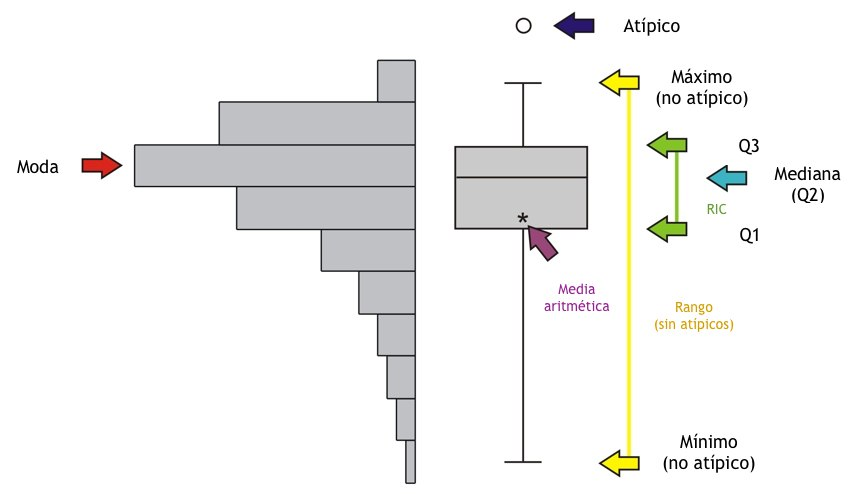

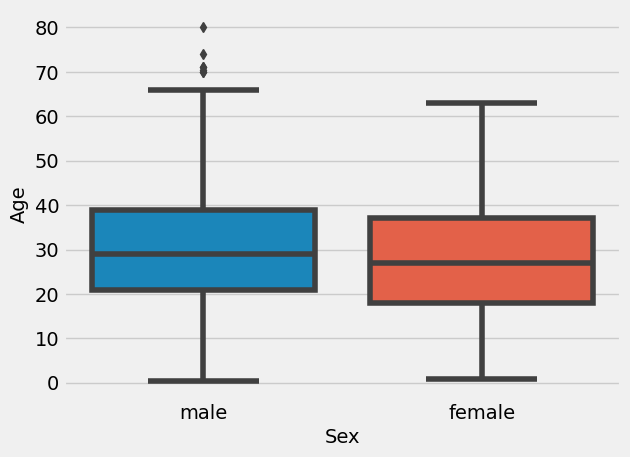

In [49]:
sns.boxplot(x="Sex", y="Age", data=data)
plt.show()

¿Y sobreviven mas los pasajeros en función de su edad?

In [50]:
fig = px.histogram(data, x="Age", color="Survived")
fig.show()

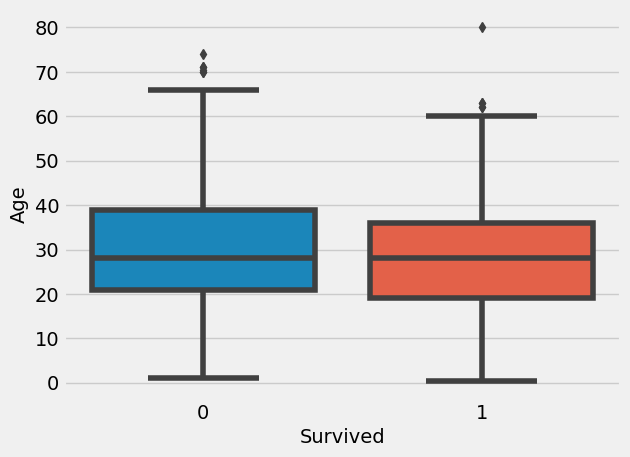

In [51]:
sns.boxplot(x="Survived", y="Age", data=data)
plt.show()

Podemos incluso combinar 3 de nuestras variables: Edad, Género y la variable objetivo.
Para esto un tipo de gráfico interesante son los violinplot (https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot).

Recordemos que un violin plot contiene la siguiente información:

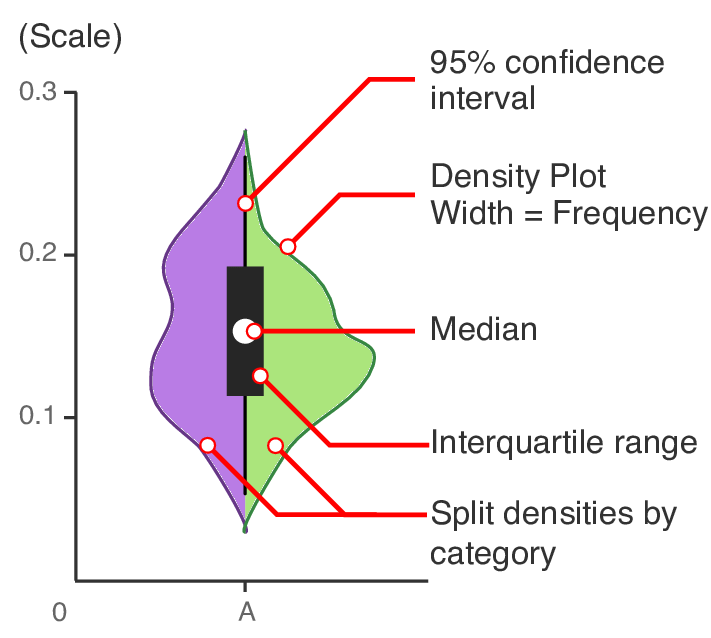

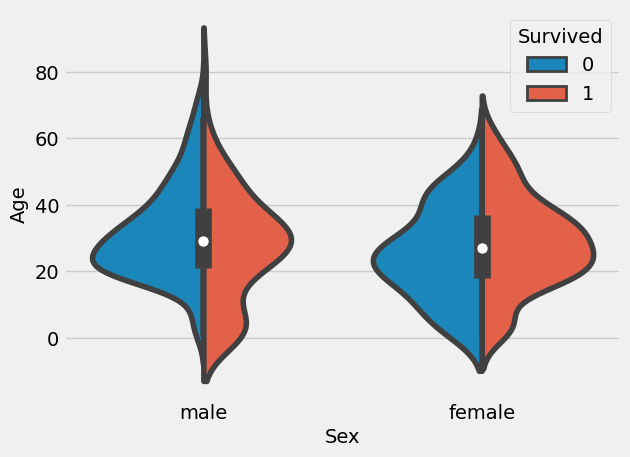

In [52]:
sns.violinplot(x="Sex",y="Age", hue="Survived", data=data,split=True)
plt.show()

O si analizamos la supervivencia en función de su edad y la clase en la que viajaba:

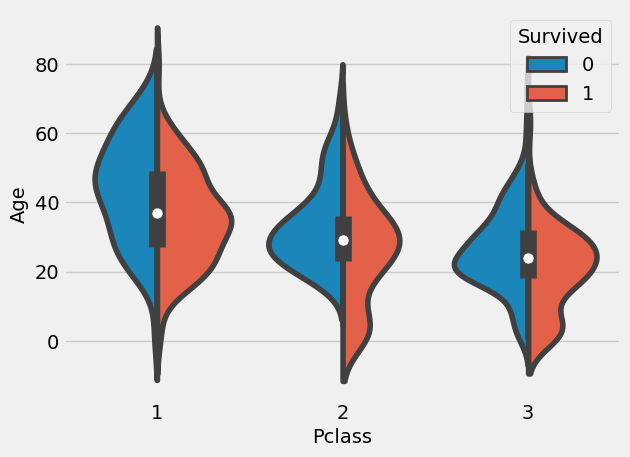

In [53]:
sns.violinplot(x="Pclass",y="Age", hue="Survived", data=data,split=True)
plt.show()

De nuevo, es factible unir varios de estos gráficos en uno solo:

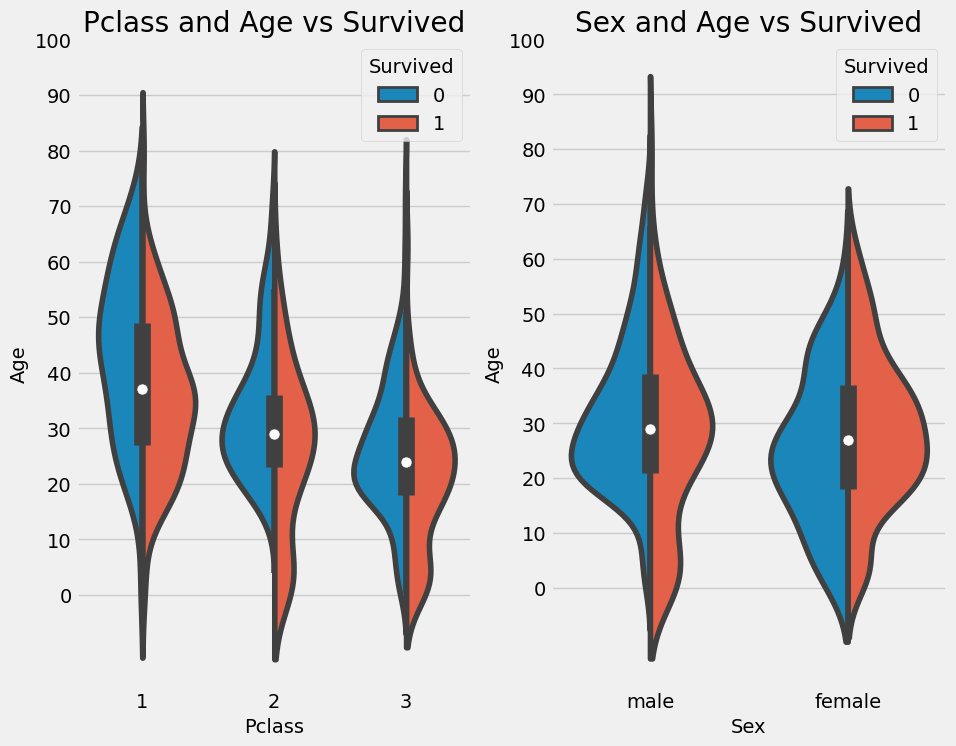

In [54]:
f,ax=plt.subplots(1,2,figsize=(10,8))

sns.violinplot(x="Pclass",y="Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot(x="Sex",y="Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

plt.show()

También existe la posibilidad de solapar dos gráficos dentro de la misma imagen, dando una visión mas completa de la información.

En este caso vemos como unir un boxplot y un scatterplot:

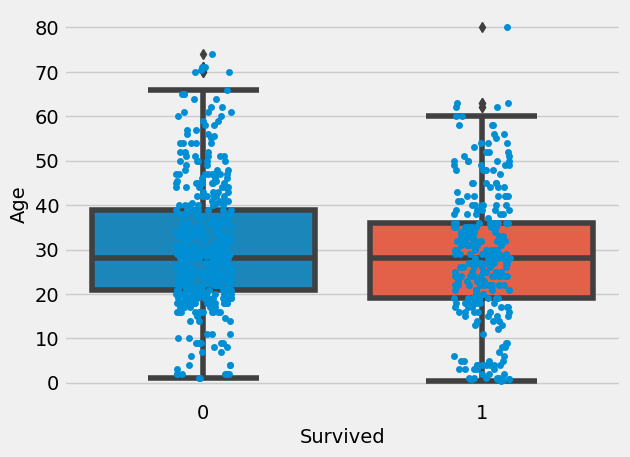

In [55]:
ax = sns.boxplot(x="Survived", y="Age",
                data=data)

ax = sns.stripplot(x="Survived", y="Age",
                   data=data, jitter=True,
                   edgecolor="gray")

### Embarked

¿En qué puerto embarcó la mayoría del pasaje?

<Axes: xlabel='Embarked', ylabel='count'>

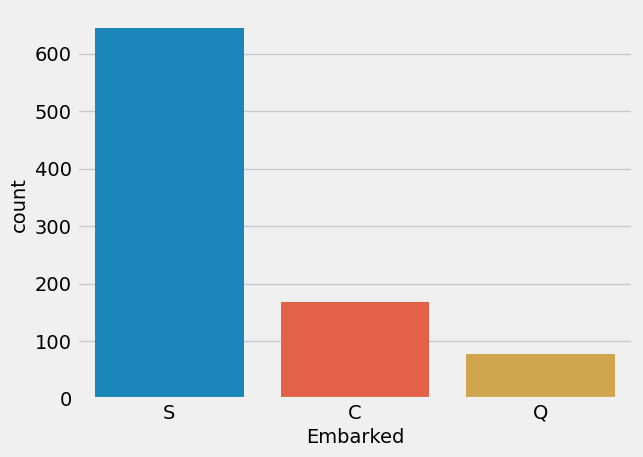

In [56]:
sns.countplot(x='Embarked',data=data)

¿Y todos las clases embarcaban en los mismo puertos?

In [57]:
pd.crosstab(data.Pclass,data.Embarked,margins=True).style.background_gradient(cmap='summer_r')

In [58]:
pd.crosstab(data.Pclass,data.Embarked,margins=True, normalize='index').style.background_gradient(cmap='summer_r')

¿Influirá el puerto y la clase en el número de supervivientes?

In [59]:
pd.crosstab([data.Embarked,data.Pclass],[data.Survived],margins=True).style.background_gradient(cmap='summer_r')

Y ahora podemos resumir todas estas preguntas en un solo gráfico:

Nota: En este caso usaremos un subplot de tamaño 2x2 (plt.subplots(**2,2**,figsize=(10,8))), la única diferencia con los ejemplo anteriores es que utilizaremos dos coordenadas al asignar ax (por ejemplo, ax=ax[**0,1**])

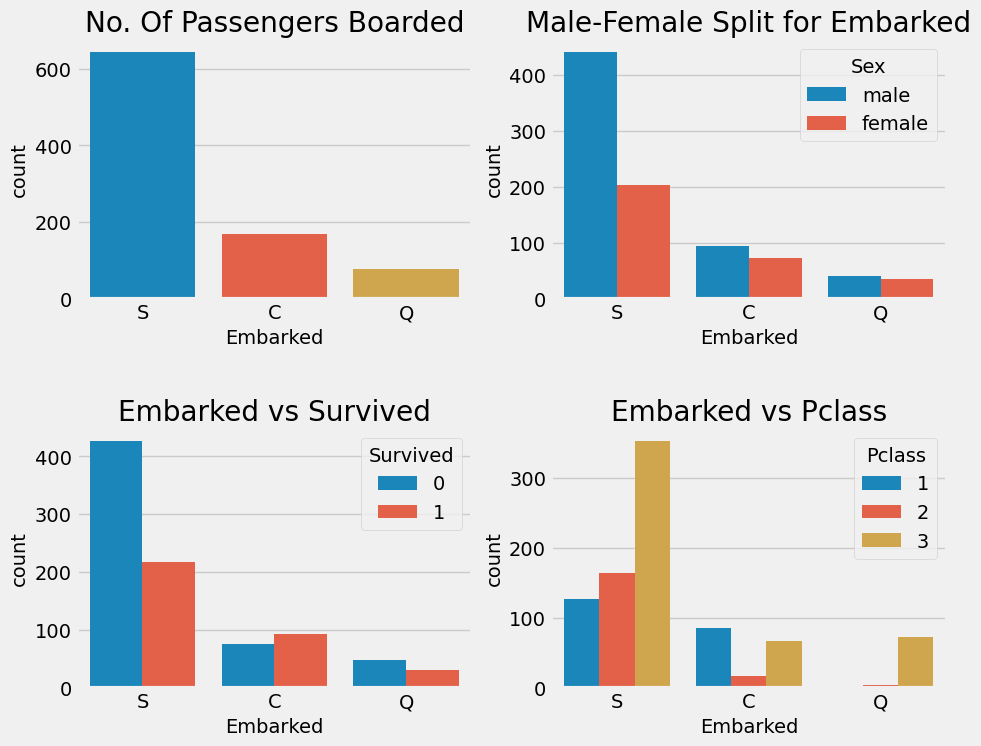

In [60]:
f,ax=plt.subplots(2,2,figsize=(10,8))

sns.countplot(x='Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot(x='Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot(x='Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot(x='Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

### SibSip

Estudiemos también otras variables como SibSip (SibSip = Number of Siblings/Spouses Aboard):

In [61]:
fig = px.histogram(data, x="SibSp")
fig.show()

<Axes: ylabel='SibSp'>

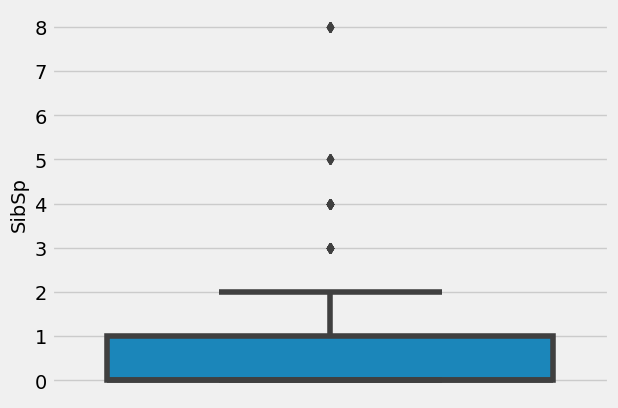

In [62]:
sns.boxplot(y="SibSp",
                data=data)

In [63]:
fig = px.histogram(data, x="SibSp", color="Survived")
fig.show()

In [64]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

¿Variará el número de hijos en función de la clase en la que viajan?

In [65]:
pd.crosstab([data.SibSp],data.Pclass).style.background_gradient(cmap='summer_r')

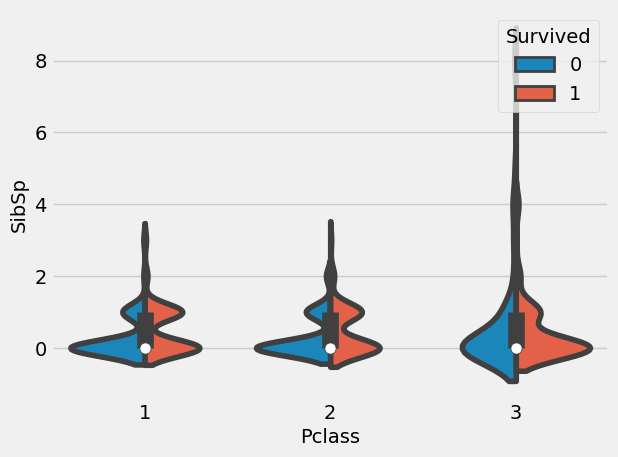

In [66]:
sns.violinplot(x="Pclass",y="SibSp", hue="Survived", data=data,split=True)
plt.show()

### Parch

O la variable Parch (Parch = Number of Parents/Children Aboard):

In [67]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

### Fare

En función del precio del billete también podemos encontrar diferencias interesantes:

In [68]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


<Axes: xlabel='Fare', ylabel='Density'>

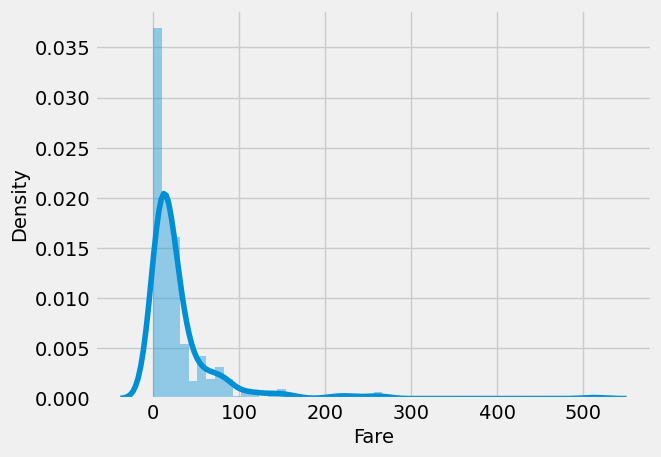

In [69]:
sns.distplot(data.Fare)

In [70]:
fig = px.histogram(data, x="Fare",
                   marginal="box", # or violin, rug
                   hover_data=data.columns)
fig.show()

En este caso usaremos el gráfico distplot dentro de seaborn, que combina el histograma con una estimación de la función densidad (https://seaborn.pydata.org/generated/seaborn.distplot.html), para representar las diferencias entre el precio del billete en función de la clase en la que viajan:

! Cuidado con la escala del eje X, puede confundir

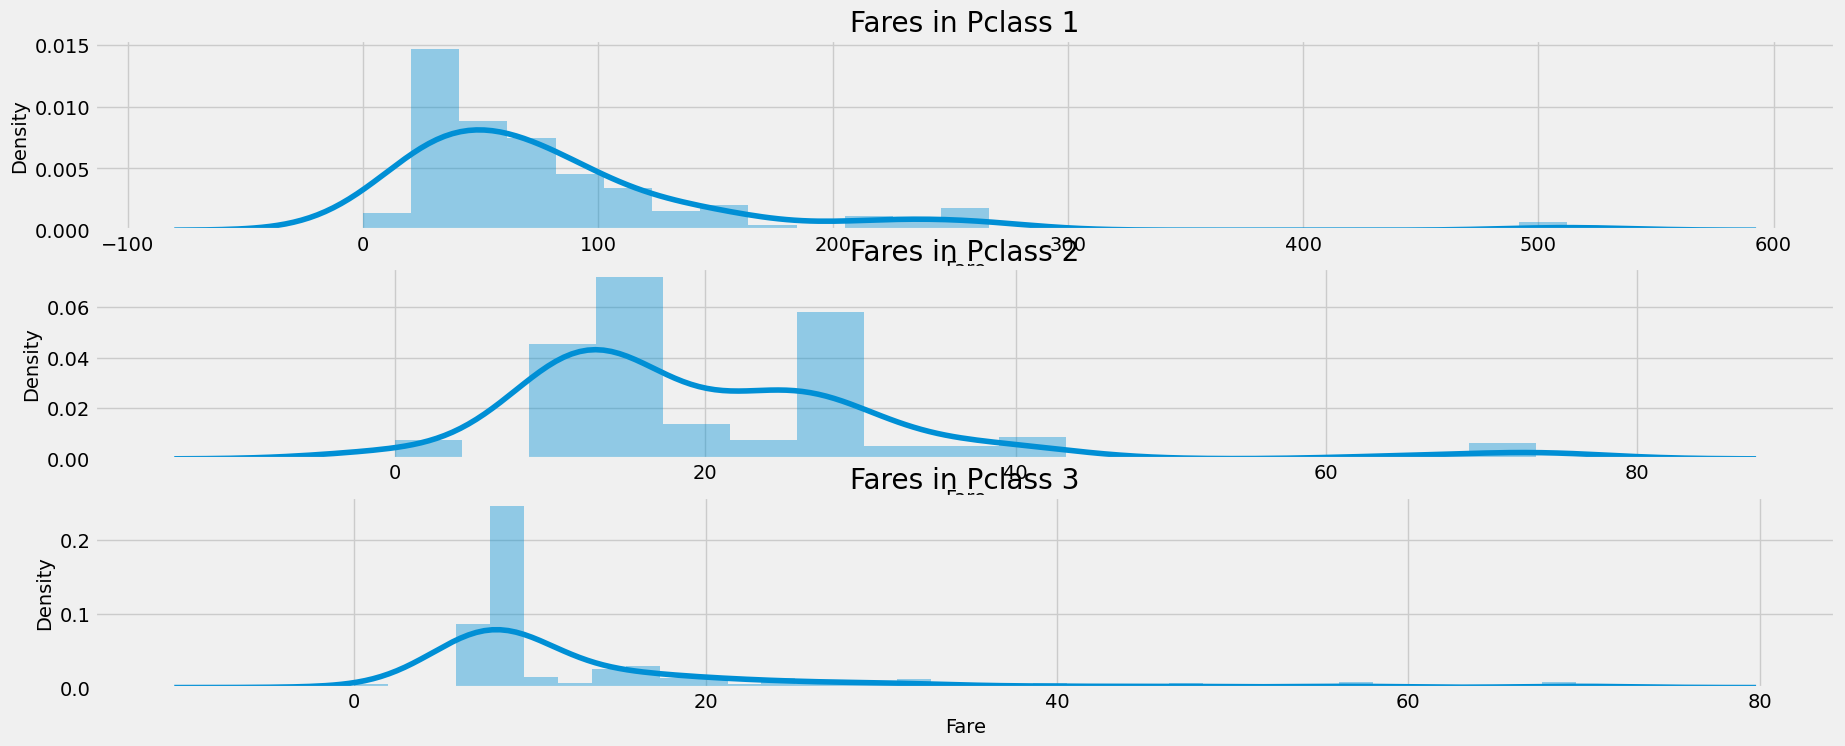

In [71]:
f,ax=plt.subplots(3,1,figsize=(20,8))

sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

In [72]:
fig = px.histogram(data, x="Fare", color="Pclass",
                   marginal="box", # or violin, rug
                   hover_data=data.columns)
fig.show()

### Análisis de correlaciones

Una forma muy interesante de representar la matriz de correlaciones (data.corr()) es usar un heatmap (https://seaborn.pydata.org/generated/seaborn.heatmap.html).

Este pequeño resumen nos ayudará a interpretarla:

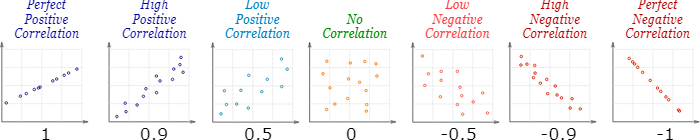

In [73]:
data.corr()

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

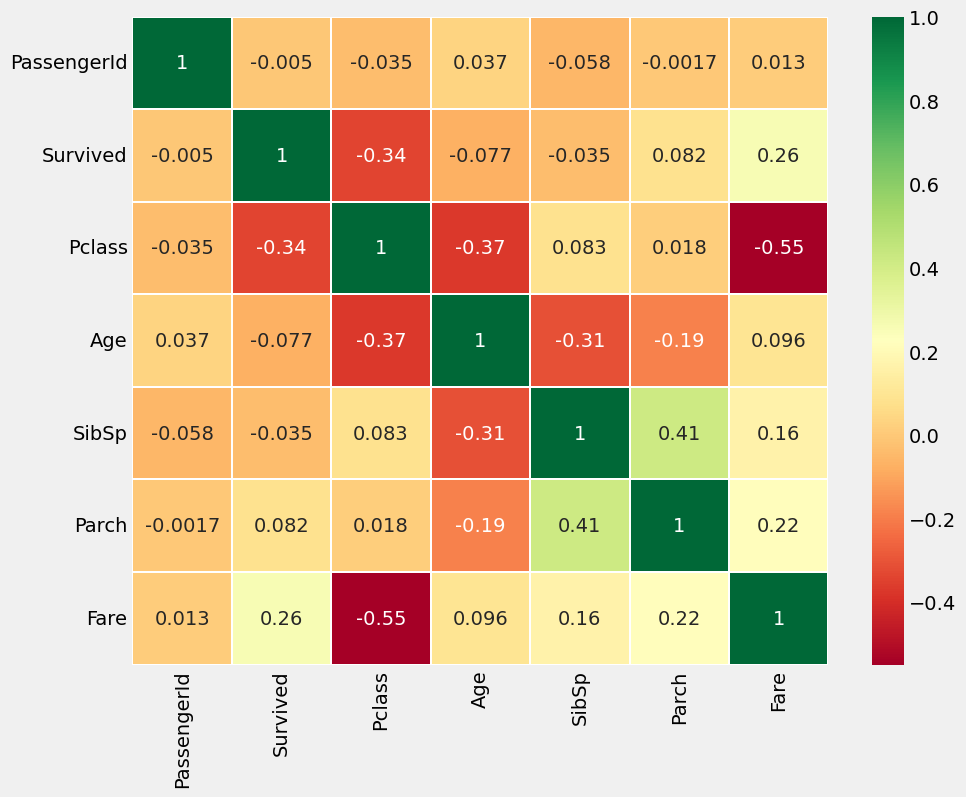

In [74]:
fig=plt.gcf()

sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.1)

fig.set_size_inches(10,8)

plt.show()

In [76]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(z=data.corr(),
                   x=data.corr().columns,
                   y=data.corr().columns))
fig.show()

# Parte 2: Feature Engineering and Data Cleaning

## 2.1 Creación de nuevas variables

### Imputación de valores missing

Procedamos ahora a localizar y sustituir los valores missing dentro de nuestras variables:

In [77]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Por ejemplo, para la variable edad sustituiremos los valores missing por la media de edad de la muestra:

In [78]:
data['Age'][data['Age'].isnull()] = np.mean(data['Age'])

En cambio, podemos añadir un nuevo nivel dentro de las variables categóricas que contemple específicamente los valores desconocidos:

In [79]:
data['Cabin'][data['Cabin'].isnull()] = "Desconocido"
data['Embarked'][data['Embarked'].isnull()] = "Desconocido"

In [80]:
data.fillna(0, inplace=True)

### Rangos de edad

Otra operación bastante común es la tramificación de variables, en este caso crearemos una nueva variable categórica a partir de distintos rangos de edad:

In [81]:
data['Age_band']='Desconocido'
data.loc[data['Age']<=18,'Age_band']='Menor de edad'
data.loc[(data['Age']>18)&(data['Age']<=32),'Age_band']='Joven'
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']='Adulto'
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']='Senior'
data.loc[data['Age']>64,'Age_band']='Jubilado'
data.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare        Cabin Embarked Age_band  
0      0  A/5 21171   7.2500  Desconocido        S    Joven  
1      0   PC 17599  71.2833          C85        C   Adulto

In [82]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

### Rango de precios del billete

Otra forma de realizar la tramificación es usar intervalos equidistantes con la función qcut (en el ejemplo, 4 cuts, estaremos separamos por cuartiles):

In [83]:
data['Fare_Range']=pd.qcut(data['Fare'],4)

In [84]:
data['Fare_Range'].value_counts().to_frame().style.background_gradient(cmap='summer')

In [85]:
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

O podemos establecer nosostros los intervalor que deseemos:

In [86]:
data['Fare_cat']='Desconocido'
data.loc[data['Fare']<=8,'Fare_cat']='Precio Bajo'
data.loc[(data['Fare']>8)&(data['Fare']<=20),'Fare_cat']='Precio medio'
data.loc[(data['Fare']>20)&(data['Fare']<=50),'Fare_cat']='Precio medio-alto'
data.loc[(data['Fare']>50)&(data['Fare']<=10000),'Fare_cat']='Precio alto'

### Convertir Strings a Numéricas

Otra operación que deberemos abordar en algún momento es la sustitución de variables categóricos por equivalentes numéricos. En este caso sustituremos los dos tipos de género por los valores 0 y 1:

In [87]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)

**Nota:** Esta práctica concreta de transformación de categóricas a numéricas es una **simplificación** que en muchos casos es **errónea** (por ejemplo, si las categorías no tienen ningún tipo de ordinalidad). Es altamente recomendable usar otro tipo de técnicas como la **codificación por impacto** o, alternativamente, usar **one-hot encoding**.

### Selección de variables

**Name**: Es un identificador, no tiene valor de cara al modelado

**Age**: Puede ser sustituida por la variables categórica de rangos de edad

**Ticket**: Es un identificador, no tiene valor de cara al modelado

**Fare**: Puede ser sustituida por la variables categórica fare_cat

**Fare_Range**: Puede ser sustituida por la variables categórica fare_cat

**PassengerId**: Es un identificador, no tiene valor de cara al modelado

Una técnica común de selección de variables, o al menos para descartar algunas, es realizar un estudio de las correlaciones y eliminar una variable de cada par de variables altamente correladas:

In [88]:
# data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
# sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
# fig=plt.gcf()
# fig.set_size_inches(15,8)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.show()

# Parte 3: Clustering

Chequeamos primeros el tipo de variables, ya que para algunas de las técnincas de clustering que vamos a usar necesitamos solo variables numéricas:

In [89]:
data.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex               int64
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
Age_band         object
Fare_Range     category
Fare_cat         object
dtype: object

Podemos entonces ahora seleccionar las variables que queramos usar para clusterizar:

In [90]:
selected_vars = ['Fare', 'Sex', 'Age', 'SibSp', 'Parch']

X = np.array(data[selected_vars]).astype(float)
y = np.array(data['Survived'])

In [91]:
X

array([[ 7.25      ,  0.        , 22.        ,  1.        ,  0.        ],
       [71.2833    ,  1.        , 38.        ,  1.        ,  0.        ],
       [ 7.925     ,  1.        , 26.        ,  0.        ,  0.        ],
       ...,
       [23.45      ,  1.        , 29.69911765,  1.        ,  2.        ],
       [30.        ,  0.        , 26.        ,  0.        ,  0.        ],
       [ 7.75      ,  0.        , 32.        ,  0.        ,  0.        ]])

Es importante tener en cuenta algunas transformaciones de variables numéricas como el reescalado(MinMaxScaler https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html, StandarScaler https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

Que se definen de la siguiente forma:

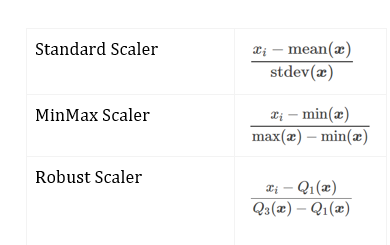

In [92]:
scaler = MinMaxScaler()
scaler2 = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [93]:
X_scaled

array([[0.01415106, 0.        , 0.27117366, 0.125     , 0.        ],
       [0.13913574, 1.        , 0.4722292 , 0.125     , 0.        ],
       [0.01546857, 1.        , 0.32143755, 0.        , 0.        ],
       ...,
       [0.04577135, 1.        , 0.36792055, 0.125     , 0.33333333],
       [0.0585561 , 0.        , 0.32143755, 0.        , 0.        ],
       [0.01512699, 0.        , 0.39683338, 0.        , 0.        ]])

## 3.1 K-means

Usaremos primero el algortirmo Kmeans (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

Una explicación muy didáctica la podeis ver en el siguiente vídeo: https://www.youtube.com/watch?v=4b5d3muPQmA&app=desktop

Para el desarrollo de una clusterización tendremos comumente las siguientes fases:

1) Inicialización del cluster, selección de parámetros

2) Ajuste (.fit)

3) Asignación del cluster correspondiente a cada observación

4) Entendimiento de cada cluster (por ejemplo, analizando las coordenadas de los centroides)

5) Ratios de la variable objetivo por cluster, para entender si, por ejemplo, hay algunos cluster con mayor posibilidad de supervivencia

### Variables originales:

In [94]:
kmeans = KMeans(n_clusters=5) # Inicialización

kmeans_fitted = kmeans.fit(X)

In [95]:
data['Cluster_Kmeans'] = kmeans_fitted.predict(X)
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare        Cabin Embarked Age_band       Fare_Range  \
0         A/5 21171   7.2500  Desconocido        S    Joven   (-0.001, 7.91]   
1          PC 17599  71.2833          C85        C   Adulto  (31.0, 512.329]   
2  STON/O2. 3101282   7.9250  Desconocido        S    Joven   (7.91, 14.454]   
3            113803  53.1000         C123        S   Adulto  (31.0, 512.329]   
4            373450   8.0500  Desconocido        S   Adulto   (7.91, 14.454]   

       Fare_cat  Cluster_Kmeans  
0   Precio Bajo               0  
1   Precio alto               2  
2   Precio Bajo               0  
3   Precio alto               2  
4  Precio medio               0

In [96]:
data.Cluster_Kmeans.value_counts()

0    712
2    126
4     33
1     17
3      3
Name: Cluster_Kmeans, dtype: int64

In [97]:
kmeans_fitted.cluster_centers_

array([[1.47696034e+01, 3.08988764e-01, 2.86519874e+01, 3.97471910e-01,
        3.13202247e-01],
       [2.38187253e+02, 6.47058824e-01, 3.02587197e+01, 8.82352941e-01,
        1.17647059e+00],
       [6.55972238e+01, 4.76190476e-01, 3.47562162e+01, 1.17460317e+00,
        5.55555556e-01],
       [5.12329200e+02, 3.33333333e-01, 3.53333333e+01, 1.11022302e-16,
        3.33333333e-01],
       [1.31108200e+02, 6.66666667e-01, 3.21823440e+01, 6.06060606e-01,
        7.87878788e-01]])

In [98]:
data.groupby('Cluster_Kmeans').mean()

PassengerId  Survived    Pclass       Sex        Age  \
Cluster_Kmeans                                                         
0                443.778090  0.321629  2.564607  0.308989  28.651987   
1                460.941176  0.647059  1.000000  0.647059  30.258720   
2                453.579365  0.587302  1.412698  0.476190  34.756216   
3                559.000000  1.000000  1.000000  0.333333  35.333333   
4                447.030303  0.757576  1.000000  0.666667  32.182344   

                   SibSp     Parch        Fare  
Cluster_Kmeans                                  
0               0.397472  0.313202   14.769603  
1               0.882353  1.176471  238.187253  
2               1.174603  0.555556   65.597224  
3               0.000000  0.333333  512.329200  
4               0.606061  0.787879  131.108200

In [99]:
pd.crosstab(data.Cluster_Kmeans,data.Survived).style.background_gradient(cmap='summer_r')

In [100]:
pd.crosstab(data.Cluster_Kmeans,data.Survived, normalize='index').style.background_gradient(cmap='summer_r')

### Variables reescaladas:

Es importante tener en cuenta que las transformaciones que efectuemos sobres las variables afectan significativamente en las conclusiones. Veamos por ejemplo qué pasaría si hacemos el clustering con las variables reescaladas:

In [101]:
kmeans_fitted_rescaled = kmeans.fit(X_scaled)

In [102]:
data['Cluster_Kmeans_scaled'] = kmeans_fitted_rescaled.predict(X_scaled)
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare        Cabin Embarked Age_band       Fare_Range  \
0         A/5 21171   7.2500  Desconocido        S    Joven   (-0.001, 7.91]   
1          PC 17599  71.2833          C85        C   Adulto  (31.0, 512.329]   
2  STON/O2. 3101282   7.9250  Desconocido        S    Joven   (7.91, 14.454]   
3            113803  53.1000         C123        S   Adulto  (31.0, 512.329]   
4            373450   8.0500  Desconocido        S   Adulto   (7.91, 14.454]   

       Fare_cat  Cluster_Kmeans  Cluster_Kmeans_scaled  
0   Precio Bajo               0                      1  
1   Precio alto               2                      2  
2   Precio Bajo               0                      2  
3   Precio alto               2                      2  
4  Precio medio               0                      1

In [103]:
kmeans_fitted_rescaled.cluster_centers_

array([[ 9.72239519e-02,  1.00000000e+00,  2.41059951e-01,
         1.87500000e-01,  3.37398374e-01],
       [ 3.56837323e-02, -2.22044605e-16,  3.39000180e-01,
         2.46394231e-02,  1.12179487e-02],
       [ 8.31411473e-02,  1.00000000e+00,  3.87547667e-01,
         5.11853448e-02,  2.72988506e-02],
       [ 8.68528477e-02,  0.00000000e+00,  1.38840087e-01,
         3.42500000e-01,  2.80000000e-01],
       [ 8.61141784e-02,  0.00000000e+00,  6.32190622e-01,
         3.26576577e-02,  3.60360360e-02]])

In [104]:
data.Cluster_Kmeans_scaled.value_counts()

1    415
2    232
4    112
0     82
3     50
Name: Cluster_Kmeans_scaled, dtype: int64

In [105]:
data.groupby('Cluster_Kmeans_scaled').mean()

PassengerId  Survived    Pclass  Sex        Age  \
Cluster_Kmeans_scaled                                                    
0                       449.256098  0.597561  2.414634  1.0  19.603551   
1                       462.426506  0.161446  2.527711  0.0  27.367267   
2                       424.586207  0.793103  2.068966  1.0  31.261043   
3                       405.760000  0.380000  2.580000  0.0  11.468894   
4                       445.071429  0.205357  1.794643  0.0  50.633929   

                          SibSp     Parch       Fare  Cluster_Kmeans  
Cluster_Kmeans_scaled                                                 
0                      1.500000  2.024390  49.810670        0.597561  
1                      0.197590  0.067470  18.308461        0.187952  
2                      0.409483  0.163793  42.595638        0.745690  
3                      2.740000  1.680000  44.497250        0.660000  
4                      0.258929  0.214286  43.789399        0.687500

¿Podrías darle nombre a los 5 clusters que hemos obtenido?

0:

1:

2:

3:

4:

¿Habrá clusters con mayor probabilidad de supervivencia?

In [106]:
pd.crosstab(data.Cluster_Kmeans_scaled,data.Survived).style.background_gradient(cmap='summer_r')

In [107]:
pd.crosstab(data.Cluster_Kmeans_scaled,data.Survived, normalize='index').style.background_gradient(cmap='summer_r')

### Método de Elbow:

Podemos usar este método para seleccionar valor de k (https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/).

Es importante comentar que en algunos casos las selección del valor de k tendrá que tener en cuenta también los objetivos de negocio que se intentan resolver con estas técnicas de clustering, y no solo criterios puramente estadísticos.

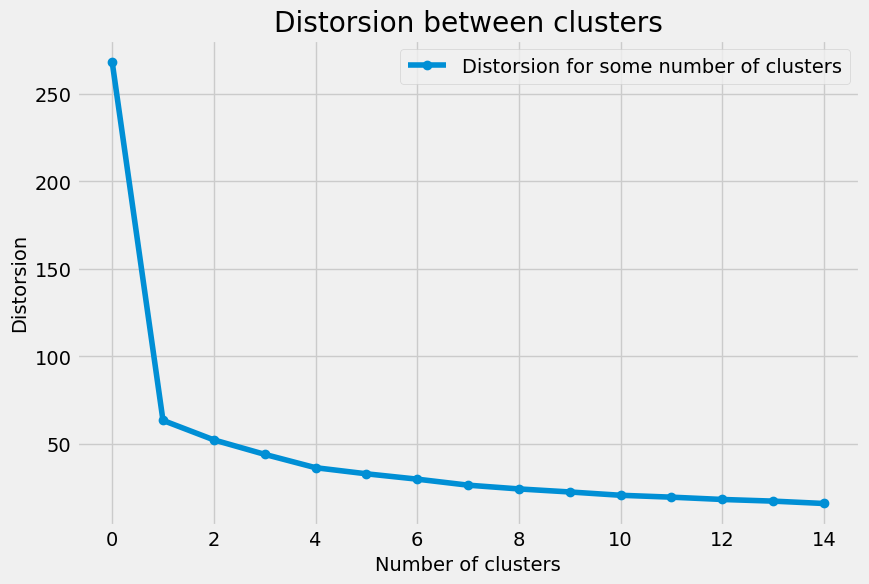

In [108]:
cluster_distorsion = []

for i in range(1, 16):
    test_sklearn = KMeans(n_clusters=i)
    test_sklearn.fit(X_scaled)
    cluster_distorsion.append(test_sklearn.inertia_)

plt.figure(figsize=(9, 6))
plt.plot(cluster_distorsion, marker='o', label='Distorsion for some number of clusters')
plt.title("Distorsion between clusters")
plt.xlabel('Number of clusters')
plt.ylabel("Distorsion")
plt.legend()
plt.show()

## 3.2 Clustering jerárquico

Veamos un ejemplo ahora de clustering jerárquico con la función AgglomerativeClustering (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) y su representación con un dendograma:

### Variables originales:

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare        Cabin Embarked Age_band       Fare_Range  \
0         A/5 21171   7.2500  Desconocido        S    Joven   (-0.001, 7.91]   
1          PC 17599  71.2833          C85        C   Adulto  (31.0, 512.329]   
2  STON/O2. 3101282   7.9250  Desconocido        S    Joven   (7.91, 14.454]   
3            113803  53.1000         C123        S   Adulto  (31.0, 512.329]   
4            373450   8.0500  Desconocido        S   Adulto   (7.91, 14.454]   

       Fare_cat  Cluster_Kmeans  Cluster_Kmeans_scaled  Cluster_jerarquico  
0   Precio Bajo               0                      1                   0  
1   Precio alto               2                      2                   2  
2   Precio Bajo               0                      2                   0  
3   Precio alto               2                      2                   0  
4  Precio medio               0                      1                   0

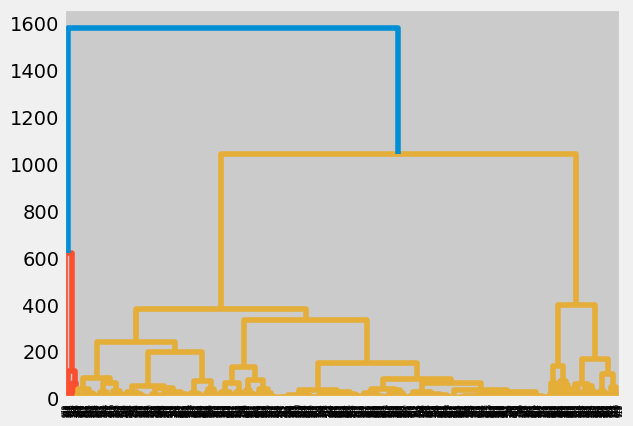

In [109]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')

hc_fitted = hc.fit(X)

data['Cluster_jerarquico'] = hc_fitted.labels_
data.head()

In [110]:
data.groupby('Cluster_jerarquico').mean()

PassengerId  Survived    Pclass       Sex        Age  \
Cluster_jerarquico                                                         
0                    446.492063  0.334656  2.511905  0.313492  28.643528   
1                    447.030303  0.757576  1.000000  0.666667  32.182344   
2                    433.817073  0.609756  1.280488  0.524390  38.109648   
3                    559.000000  1.000000  1.000000  0.333333  35.333333   
4                    460.941176  0.647059  1.000000  0.647059  30.258720   

                       SibSp     Parch        Fare  Cluster_Kmeans  \
Cluster_jerarquico                                                   
0                   0.431217  0.329365   16.856040        0.116402   
1                   0.606061  0.787879  131.108200        4.000000   
2                   1.280488  0.536585   73.634657        2.000000   
3                   0.000000  0.333333  512.329200        3.000000   
4                   0.882353  1.176471  238.187253        1.000000   

                    Cluster_Kmeans_scaled  
Cluster_jerarquico                         
0                                1.578042  
1                                2.090909  
2                                2.219512  
3                                3.333333  
4                                1.352941

In [111]:
pd.crosstab(data.Cluster_jerarquico,data.Survived).style.background_gradient(cmap='summer_r')

In [112]:
pd.crosstab(data.Cluster_jerarquico,data.Survived, normalize='index').style.background_gradient(cmap='summer_r')

### Variables reescaladas:

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare        Cabin Embarked Age_band       Fare_Range  \
0         A/5 21171   7.2500  Desconocido        S    Joven   (-0.001, 7.91]   
1          PC 17599  71.2833          C85        C   Adulto  (31.0, 512.329]   
2  STON/O2. 3101282   7.9250  Desconocido        S    Joven   (7.91, 14.454]   
3            113803  53.1000         C123        S   Adulto  (31.0, 512.329]   
4            373450   8.0500  Desconocido        S   Adulto   (7.91, 14.454]   

       Fare_cat  Cluster_Kmeans  Cluster_Kmeans_scaled  Cluster_jerarquico  \
0   Precio Bajo               0                      1                   0   
1   Precio alto               2                      2                   2   
2   Precio Bajo               0                      2                   0   
3   Precio alto               2                      2                   0   
4  Precio medio               0                      1                   0   

   Cluster_jerarquico_scaled  
0                          0  
1                          1  
2                          1  
3                          1  
4                          0

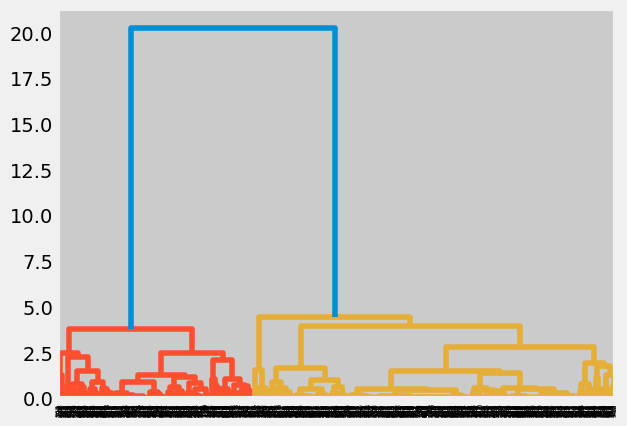

In [113]:
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))

hc_fitted_rescaled = hc.fit(X_scaled)

data['Cluster_jerarquico_scaled'] = hc_fitted_rescaled.labels_
data.head()

In [114]:
data.groupby('Cluster_jerarquico_scaled').mean()

PassengerId  Survived    Pclass  Sex        Age  \
Cluster_jerarquico_scaled                                                    
0                           457.913551  0.198598  2.514019  0.0  26.296879   
1                           417.542222  0.795556  2.040000  1.0  31.583383   
2                           365.375000  0.083333  2.958333  0.0  10.324853   
3                           458.296000  0.176000  1.856000  0.0  48.792000   
4                           465.123596  0.606742  2.460674  1.0  19.705529   

                              SibSp     Parch       Fare  Cluster_Kmeans  \
Cluster_jerarquico_scaled                                                  
0                          0.233645  0.207944  23.451244        0.247664   
1                          0.480000  0.168889  48.438150        0.782222   
2                          4.625000  1.541667  41.277604        0.666667   
3                          0.296000  0.080000  29.595934        0.528000   
4                          1.235955  1.865169  34.472798        0.516854   

                           Cluster_Kmeans_scaled  Cluster_jerarquico  
Cluster_jerarquico_scaled                                             
0                                       1.191589            0.147196  
1                                       1.893333            0.613333  
2                                       3.000000            0.333333  
3                                       3.448000            0.384000  
4                                       0.426966            0.191011

In [115]:
pd.crosstab(data.Cluster_jerarquico_scaled,data.Survived).style.background_gradient(cmap='summer_r')

In [116]:
pd.crosstab(data.Cluster_jerarquico_scaled,data.Survived, normalize='index').style.background_gradient(cmap='summer_r')

## 3.3 DBSCAN:

También tenemos disponible el DBSCAN (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html):

### Variables originales:

In [117]:
dbscan = DBSCAN(eps=0.4, min_samples = 2)

dbscan_fitted = dbscan.fit(X)

In [118]:
data['Cluster_dbscan'] = dbscan_fitted.labels_
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare        Cabin Embarked Age_band       Fare_Range  \
0         A/5 21171   7.2500  Desconocido        S    Joven   (-0.001, 7.91]   
1          PC 17599  71.2833          C85        C   Adulto  (31.0, 512.329]   
2  STON/O2. 3101282   7.9250  Desconocido        S    Joven   (7.91, 14.454]   
3            113803  53.1000         C123        S   Adulto  (31.0, 512.329]   
4            373450   8.0500  Desconocido        S   Adulto   (7.91, 14.454]   

       Fare_cat  Cluster_Kmeans  Cluster_Kmeans_scaled  Cluster_jerarquico  \
0   Precio Bajo               0                      1                   0   
1   Precio alto               2                      2                   2   
2   Precio Bajo               0                      2                   0   
3   Precio alto               2                      2                   0   
4  Precio medio               0                      1                   0   

   Cluster_jerarquico_scaled  Cluster_dbscan  
0                          0              -1  
1                          1              -1  
2                          1               0  
3                          1              -1  
4                          0               1

In [119]:
data.groupby('Cluster_dbscan').mean()

PassengerId  Survived    Pclass       Sex        Age  \
Cluster_dbscan                                                         
-1               445.073529  0.459559  2.053309  0.452206  30.601733   
 0               159.500000  1.000000  3.000000  1.000000  26.000000   
 1               489.333333  0.000000  3.000000  0.000000  35.000000   
 2               443.739726  0.054795  3.000000  0.000000  29.723848   
 3               396.750000  0.000000  3.000000  0.000000  20.000000   
...                     ...       ...       ...       ...        ...   
 82              790.500000  1.000000  1.000000  0.000000  29.699118   
 83              767.000000  0.333333  3.000000  0.000000  31.000000   
 84              794.000000  0.000000  3.000000  0.000000  23.000000   
 85              797.500000  0.500000  3.000000  1.000000  18.000000   
 86              802.500000  0.000000  2.000000  0.000000  39.000000   

                   SibSp     Parch       Fare  Cluster_Kmeans  \
Cluster_dbscan                                                  
-1              0.683824  0.586397  44.524434        0.694853   
 0              0.000000  0.000000   7.889600        0.000000   
 1              0.000000  0.000000   7.998600        0.000000   
 2              0.000000  0.000000   7.718603        0.000000   
 3              0.000000  0.000000   7.920850        0.000000   
...                  ...       ...        ...             ...   
 82             0.000000  0.000000  29.850000        0.000000   
 83             0.000000  0.000000   7.816667        0.000000   
 84             0.000000  0.000000   7.875000        0.000000   
 85             0.000000  0.000000   7.635400        0.000000   
 86             0.000000  0.000000  13.000000        0.000000   

                Cluster_Kmeans_scaled  Cluster_jerarquico  \
Cluster_dbscan                                              
-1                           1.895221            0.470588   
 0                           2.000000            0.000000   
 1                           1.000000            0.000000   
 2                           1.000000            0.000000   
 3                           1.000000            0.000000   
...                               ...                 ...   
 82                          1.000000            0.000000   
 83                          1.000000            0.000000   
 84                          1.000000            0.000000   
 85                          2.000000            0.000000   
 86                          1.000000            0.000000   

                Cluster_jerarquico_scaled  
Cluster_dbscan                             
-1                               1.573529  
 0                               1.000000  
 1                               0.000000  
 2                               0.000000  
 3                               0.000000  
...                                   ...  
 82                              0.000000  
 83                              0.000000  
 84                              0.000000  
 85                              1.000000  
 86                              3.000000  

[88 rows x 12 columns]

In [120]:
pd.crosstab(data.Cluster_dbscan,data.Survived).style.background_gradient(cmap='summer_r')

In [121]:
pd.crosstab(data.Cluster_dbscan,data.Survived, normalize='index').style.background_gradient(cmap='summer_r')

### Variables reescaladas:

In [122]:
dbscan_fitted_scaled = dbscan.fit(X_scaled)

data['Cluster_dbscan_scaled'] = dbscan_fitted_scaled.labels_
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  ... Embarked Age_band       Fare_Range  \
0         A/5 21171   7.2500  ...        S    Joven   (-0.001, 7.91]   
1          PC 17599  71.2833  ...        C   Adulto  (31.0, 512.329]   
2  STON/O2. 3101282   7.9250  ...        S    Joven   (7.91, 14.454]   
3            113803  53.1000  ...        S   Adulto  (31.0, 512.329]   
4            373450   8.0500  ...        S   Adulto   (7.91, 14.454]   

       Fare_cat Cluster_Kmeans  Cluster_Kmeans_scaled  Cluster_jerarquico  \
0   Precio Bajo              0                      1                   0   
1   Precio alto              2                      2                   2   
2   Precio Bajo              0                      2                   0   
3   Precio alto              2                      2                   0   
4  Precio medio              0                      1                   0   

   Cluster_jerarquico_scaled  Cluster_dbscan  Cluster_dbscan_scaled  
0                          0              -1                      0  
1                          1              -1                      1  
2                          1               0                      1  
3                          1              -1                      1  
4                          0               1                      0  

[5 rows x 21 columns]

In [123]:
data.groupby('Cluster_dbscan_scaled').mean()

PassengerId  Survived    Pclass  Sex        Age  \
Cluster_dbscan_scaled                                                    
-1                      349.000000  0.500000  1.000000  0.5  49.500000   
 0                      453.775439  0.187719  2.392982  0.0  30.435200   
 1                      429.825806  0.748387  2.154839  1.0  28.180503   
 2                      383.500000  0.000000  3.000000  0.0  29.699118   
 3                      612.666667  0.000000  3.000000  1.0  29.699118   
 4                      709.000000  1.000000  1.000000  0.0  35.500000   

                          SibSp     Parch        Fare  Cluster_Kmeans  \
Cluster_dbscan_scaled                                                   
-1                     0.500000  2.000000  387.664600        2.000000   
 0                     0.377193  0.215789   23.090225        0.303509   
 1                     0.625806  0.638710   42.728012        0.687097   
 2                     8.000000  2.000000   69.550000        2.000000   
 3                     8.000000  2.000000   69.550000        2.000000   
 4                     0.000000  0.500000  512.329200        3.000000   

                       Cluster_Kmeans_scaled  Cluster_jerarquico  \
Cluster_dbscan_scaled                                              
-1                                  3.000000            3.500000   
 0                                  1.735088            0.177193   
 1                                  1.490323            0.470968   
 2                                  3.000000            2.000000   
 3                                  0.000000            2.000000   
 4                                  4.000000            3.000000   

                       Cluster_jerarquico_scaled  Cluster_dbscan  
Cluster_dbscan_scaled                                             
-1                                      0.500000       -1.000000  
 0                                      0.728070       13.387719  
 1                                      1.832258        6.116129  
 2                                      2.000000       34.000000  
 3                                      4.000000       38.000000  
 4                                      0.000000       -1.000000

In [124]:
pd.crosstab(data.Cluster_dbscan_scaled,data.Survived).style.background_gradient(cmap='summer_r')

In [125]:
pd.crosstab(data.Cluster_dbscan_scaled,data.Survived, normalize='index').style.background_gradient(cmap='summer_r')